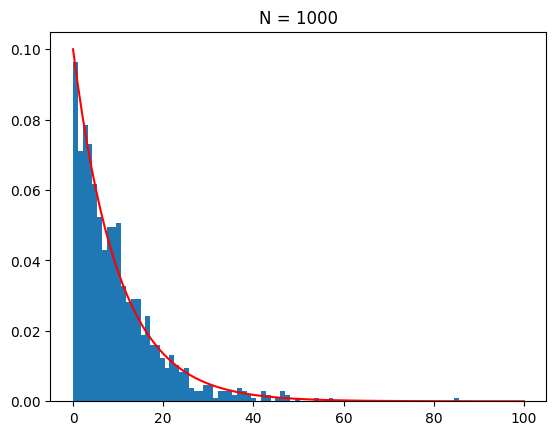

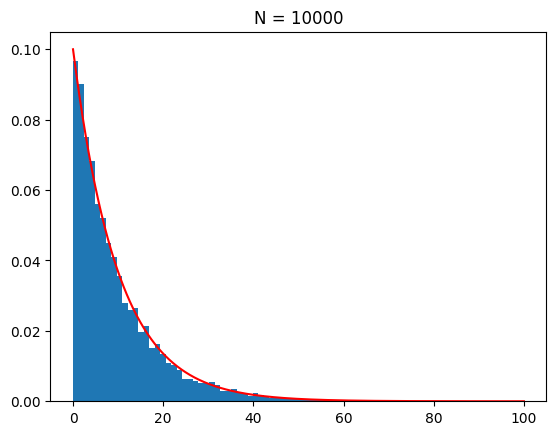

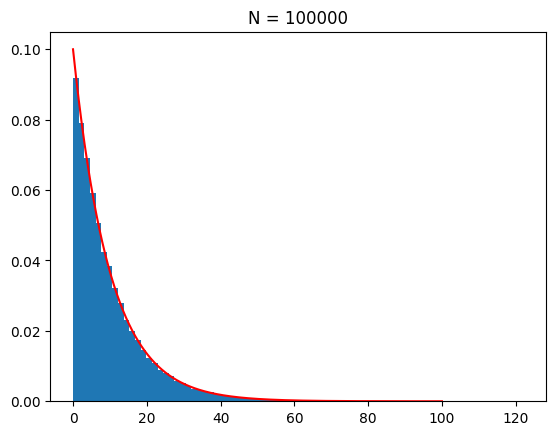

In [1]:
# Exercise 1 Lab 1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mu = 10
for N in [1000, 10000, 100000]:
    y = stats.expon.rvs(scale=mu, size=N)
    plt.hist(y, 80, density=True)
    t = np.linspace(0, 100, N // 10)
    pdf = stats.expon.pdf(t, scale=mu)
    plt.plot(t, pdf, 'red')
    plt.title(f'N = {N}')
    plt.show()




<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_7852\4108090507.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['True $\mu$', 'Estimation of $\mu$'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7852\4108090507.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['True $\mu$', 'Estimation of $\mu$'])


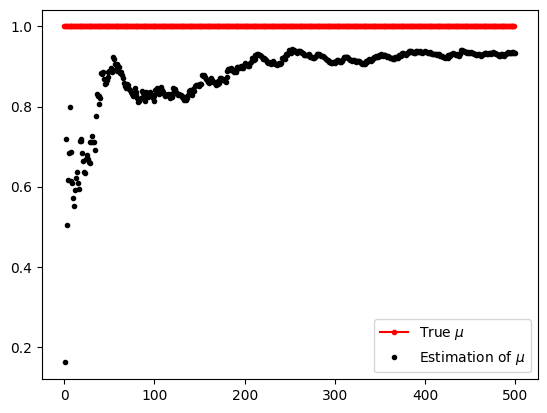

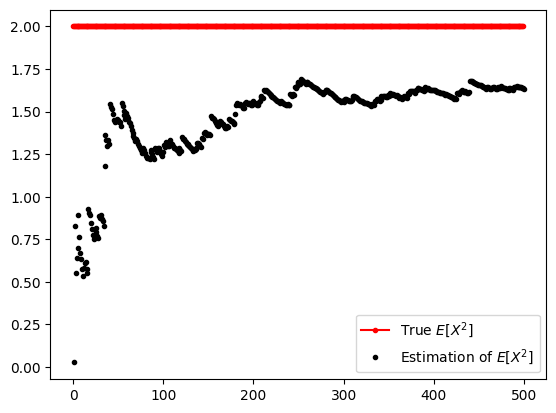

In [2]:
# Exercise 2 Lab 1

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mu = 1
M = 500
x = stats.expon.rvs(scale=mu, size=M)

plt.plot(np.ones(M) * mu, 'r.-')

for k in range(1, M + 1):
    plt.plot(k, np.mean(x[:k]), 'k.')

plt.legend(['True $\mu$', 'Estimation of $\mu$'])
plt.show()

# Optional: with squared values
plt.plot(np.ones(M) * 2*mu**2, 'r.-')  # expected value of X^2 for exponential
for k in range(1, M + 1):
    plt.plot(k, np.mean(x[:k]**2), 'k.')
plt.legend(['True $E[X^2]$', 'Estimation of $E[X^2]$'])
plt.show()


In [3]:
# Exercise 3 Lab 1

import numpy as np
from scipy import stats

mu = 1
N = 10000
y = stats.expon.rvs(scale=mu, size=N)   # simulate N exponential samples
print(np.mean(y))                        # Monte Carlo estimate of E[X]


1.0020038140819274


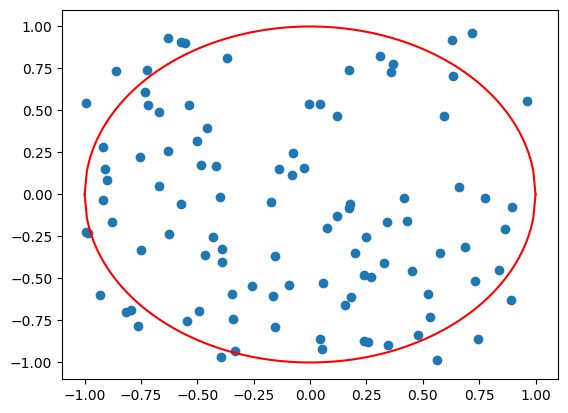

3.24
0.6842
0.6826894921370859


In [4]:
# Exercise 4 Lab 1

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

N = 100
U = 2 * stats.uniform.rvs(size=N) - 1   # uniform in [-1,1]
V = 2 * stats.uniform.rvs(size=N) - 1

plt.plot(U, V, 'o')  # plot points

X = np.linspace(-1, 1, 200)
plt.plot(X, np.sqrt(1 - X**2), 'r')  # top half of circle
plt.plot(X, -np.sqrt(1 - X**2), 'r') # bottom half of circle
plt.show()

Z = (np.sqrt(U**2 + V**2) <= 1)      # True if point in circle
pi = 4 * np.mean(Z)                   # Monte Carlo estimate
print(pi)

N = 100000
X = stats.norm.rvs(loc=0, scale=1, size=N)  # simulate normal
prob_estimate = np.mean((X >= -1) & (X <= 1))  # proportion in [-1,1]
print(prob_estimate)

# Compare with exact probability
from scipy.stats import norm
prob_exact = norm.cdf(1) - norm.cdf(-1)
print(prob_exact)



In [5]:
# Exercise 5 Lab 1

from scipy import stats

# Define distributions
X1 = stats.binom(n=10, p=0.3)
X2 = stats.norm(loc=5, scale=3)
X3 = stats.expon(scale=1/7)

# 1. P(Xk <= 3)
print("P(X1 <= 3):", X1.cdf(3))
print("P(X2 <= 3):", X2.cdf(3))
print("P(X3 <= 3):", X3.cdf(3))

# 2. P(Xk > 7)
print("P(X1 > 7):", 1 - X1.cdf(7))
print("P(X2 > 7):", 1 - X2.cdf(7))
print("P(X3 > 7):", 1 - X3.cdf(7))

# 3. P(3 < Xk <= 4)
print("P(3 < X1 <= 4):", X1.pmf(4))               # discrete
print("P(3 < X2 <= 4):", X2.cdf(4) - X2.cdf(3))   # continuous
print("P(3 < X3 <= 4):", X3.cdf(4) - X3.cdf(3))   # continuous


P(X1 <= 3): 0.6496107184000001
P(X2 <= 3): 0.2524925375469229
P(X3 <= 3): 0.999999999241744
P(X1 > 7): 0.0015903863999999768
P(X2 > 7): 0.2524925375469229
P(X3 > 7): 0.0
P(3 < X1 <= 4): 0.2001209489999999
P(3 < X2 <= 4): 0.11694880263484075
P(3 < X3 <= 4): 7.575645666335618e-10


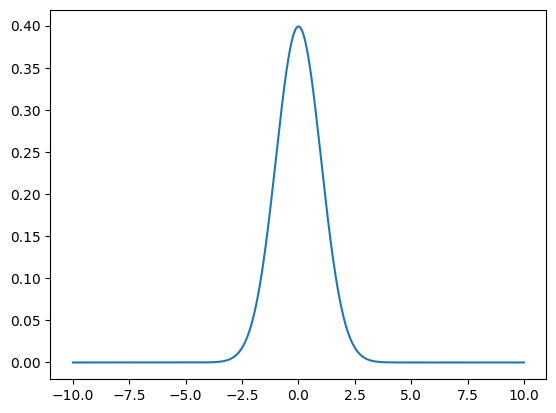

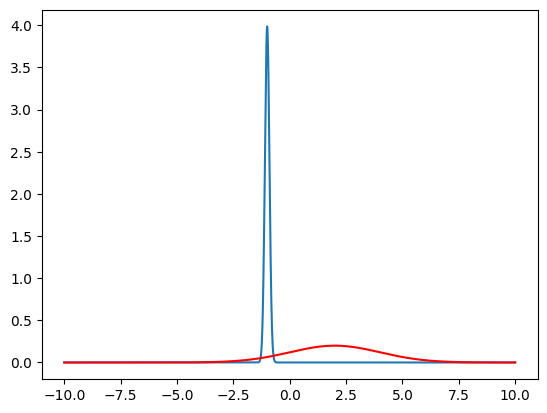

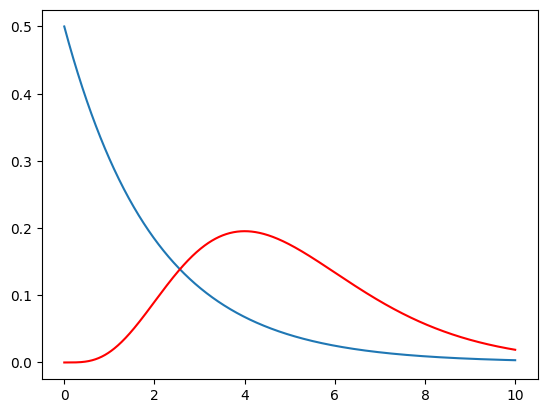

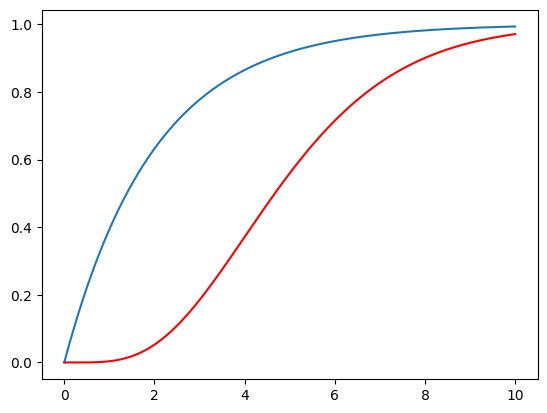

Monte Carlo estimate: 0.77753
Exact CDF: 0.7768698398515702


In [6]:
# Exercise 6 Lab 1

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1)
x = np.linspace(-10, 10, 2000)
y = stats.norm.pdf(x, 0, 1)  # N(0,1) density
plt.plot(x, y)
plt.show()

y1 = stats.norm.pdf(x, -1, 0.1)  # narrow, centered at -1
y2 = stats.norm.pdf(x, 2, 2)     # wider, centered at 2
plt.plot(x, y1)
plt.plot(x, y2, 'r')
plt.show()

# 2)

x = np.linspace(0, 10, 1000)
y = stats.gamma.pdf(x, a=1, scale=2)
z = stats.gamma.pdf(x, a=5, scale=1)
plt.plot(x, y)
plt.plot(x, z, 'r')
plt.show()

# CDF
y_cdf = stats.gamma.cdf(x, a=1, scale=2)
z_cdf = stats.gamma.cdf(x, a=5, scale=1)
plt.plot(x, y_cdf)
plt.plot(x, z_cdf, 'r')
plt.show()

# 3)

N = 100000
X = stats.gamma.rvs(a=1, scale=2, size=N)
prob_mc = np.mean(X < 3)
print("Monte Carlo estimate:", prob_mc)

# Compare with exact CDF
prob_exact = stats.gamma.cdf(3, a=1, scale=2)
print("Exact CDF:", prob_exact)



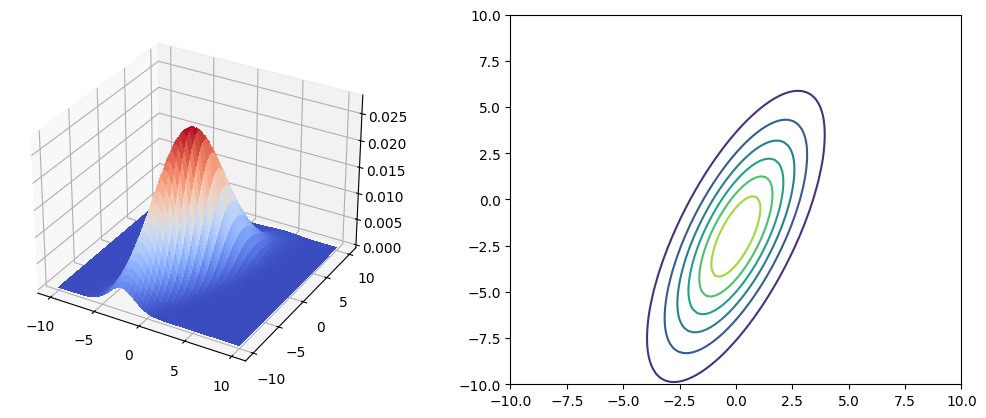

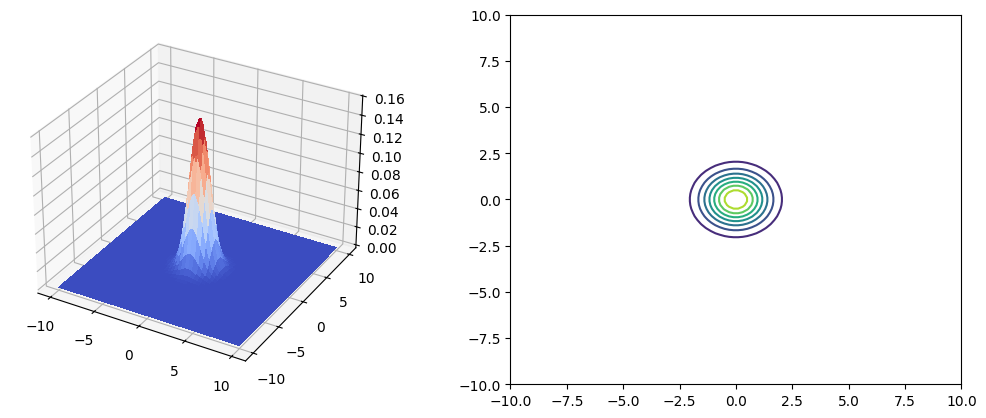

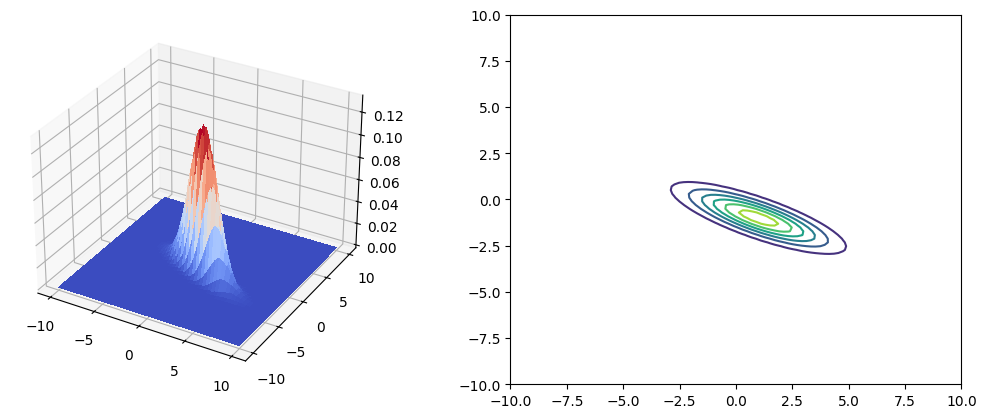

In [1]:
# Exercise 7 Lab 1

import plotting
import matplotlib.pyplot as plt

mu_x = 0
mu_y = -2
sigma_x = 2
sigma_y = 4
rho = 0.7

plotting.plot_mvn_pdf(mu_x, mu_y, sigma_x, sigma_y, rho)
plt.show()

# Example 1: independent, equal spread
plotting.plot_mvn_pdf(0, 0, 1, 1, 0)
plt.show()

# Example 2: correlated, unequal spread
plotting.plot_mvn_pdf(1, -1, 2, 1, -0.8)
plt.show()


In [1]:
import numpy as np
import tools

# Suppose we have data x_k and y_k
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.3, 3.1, 4.5, 6.0, 8.1])

# Compute w_k = log(y_k)
w = np.log(y)

# Build design matrix
X = np.column_stack((np.ones(len(x)), x))

# Estimate β0 and β1
beta, beta_int = tools.regress(X, w)

print("Estimated β:", beta)
print("95% Confidence Intervals:", beta_int)


Estimated β: [0.51692226 0.31782672]
95% Confidence Intervals: [[0.43517327 0.59867126]
 [0.29317847 0.34247497]]
